overdetermined linear systems

es 1.

In [2]:
include("LinearSystems.jl")
import .LinearSystems as ls

In [3]:

A = [
    2   -1
    0    1
    -2   2
    ]

b = [1; -5; 6]

x = ls.normal_equations(A, b)

2-element Vector{Float64}:
 -2.0
 -1.0

2. a.

In [4]:
R =  [57.59, 108.11, 149.57, 227.84, 778.14, 1427, 2870.3, 4499.9]
τ = [87.99; 224.76; 365.26; 686.98; 4332.4; 10759; 30684; 60188]
b = log.(τ)
A = hcat(ones(length(R)), log.(R))
x = ls.normal_equations(A, b)
c = exp(x[1])
α = x[2]
println("c = $c, α = $α")

c = 0.2015564974424379, α = 1.4986267262958357


2.b.

In [ ]:
using Plots, LaTeXStrings
gr()



# linea di fit
R_fit = range(0.1, 4499.9, length=100)  # Evita log(0)
log_R_fit = log.(R_fit)
log_τ_fit = x[1] .+ α .* log_R_fit

# Plot principale
grafico = plot(R, b, 
              seriestype = :scatter, 
              markersize = 5, 
              color = :red, 
              alpha = 0.8, 
              label = L"Dati: $\log(\tau)$")

# Aggiungi linea di fit
plot!(grafico, R_fit, log_τ_fit,
      linewidth = 2,
      color = :blue,
      alpha = 0.8,
      label = L"Fit: $\log(\tau) = \log(c) + \alpha \log(R)$")

# Imposta limiti
xlims!(grafico, 0, 5000)
ylims!(grafico, 0, 12)

# Ticks personalizzati
x_positions = [0, 1000, 2000, 3000, 4000, 5000]
x_labels = [L"$0$", L"$1000$", L"$2000$", L"$3000$", L"$4000$", L"$5000$"]

y_positions = [0, 2, 4, 6, 8, 10, 12]
y_labels = [L"$0$", L"$2$", L"$4$", L"$6$", L"$8$", L"$10$", L"$12$"]

plot!(grafico,
      xticks = (x_positions, x_labels),
      yticks = (y_positions, y_labels),
      grid = false,
      gridwidth = 1,
      gridcolor = :gray,
      gridalpha = 0.3)

# Labels
xlabel!(grafico, L"$R[Mkm]$")
ylabel!(grafico, L"$\log(\tau[days])$")


# Aggiungi info sul fit
annotate!(grafico, [(2000, 2, L"$c = %$(round(c, digits=2))$"),
                   (2000, 1, L"$\alpha = %$(round(α, digits=2))$")])

display(grafico)

3. a.

In [ ]:
t = zeros(60)
y = zeros(60)

function g(t)
    exp(sin(t-1))
end

for i in 1:60
    t[i] = (2*pi* i)/60
    y[i] = g(t[i])
end

B = hcat(ones(length(t)), t.^1, t.^2, t.^3, t.^4, t.^5, t.^6)
x = ls.normal_equations(B, y)
c₁, c₂, c₃, c₄, c₅, c₆, c₇ = x[1], x[2], x[3], x[4], x[5], x[6], x[7]

println("c₁ = $c₁, c₂ = $c₂, c₃ = $c₃, c₄ = $c₄, c₅ = $c₅, c₆ = $c₆, c₇ = $c₇")

C = hcat(ones(length(t)), cos.(t), sin.(t), cos.(2*t), sin.(2*t))
z = ls.normal_equations(C, y)
d₁, d₂, d₃, d₄, d₅ = z[1], z[2], z[3], z[4], z[5]

c₁ = 0.7121266717709379, c₂ = -1.3508306759677757, c₃ = 2.2251286778820503, c₄ = -0.5383110424184913, c₅ = -0.07357639443675981, c₆ = 0.03336031429403851, c₇ = -0.0025724286775295696


(1.2660658777520084, -0.9511299756194095, 0.6107135341390227, 0.11298192668439827, -0.24687001363350042)

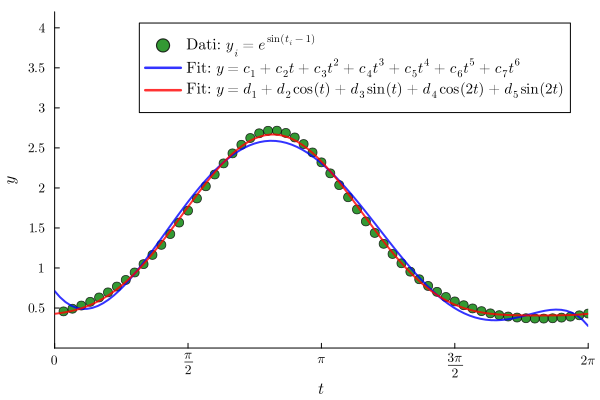

In [ ]:
using Plots, LaTeXStrings
gr()

default(fontfamily = "Computer Modern",  # Font LaTeX-style
        legendfontsize = 10,
        tickfontsize = 9,
        guidefontsize = 11)

# linea di fit
t_fit = range(0, 2*pi, length=100)  # Evita log(0)
y1_fit = c₁ .+ c₂ .* t_fit .+ c₃ .* t_fit.^2 .+ c₄ .* t_fit.^3 .+ c₅ .* t_fit.^4 .+ c₆ .* t_fit.^5 .+ c₇ .* t_fit.^6
y2_fit = d₁ .+ d₂ .* cos.(t_fit) .+ d₃ .* sin.(t_fit) .+ d₄ .* cos.(2 .* t_fit) .+ d₅ .* sin.(2 .* t_fit)

# Plot principale
grafico = plot(t, y, 
              seriestype = :scatter, 
              markersize = 5, 
              color = :green, 
              alpha = 0.8, 
              label = L"Dati: $y_i = e ^{\sin(t_i -1)} $")

#linee di fit
plot!(grafico, t_fit, y1_fit,
      linewidth = 2,
      color = :blue,
      alpha = 0.8,
      label = L"Fit: $y = c_1 + c_2 t + c_3 t^2 + c_4 t^3 + c_5 t^4 + c_6 t^5 + c_7 t^6$")

plot!(grafico, t_fit, y2_fit,
      linewidth = 2,
      color = :red,
      alpha = 0.8,
      label = L"Fit: $y = d_1 + d_2 \cos(t) + d_3 \sin(t) + d_4 \cos(2t) + d_5 \sin(2t)$"
      )

xlims!(grafico, 0, 2*pi)
ylims!(grafico, 0, 4.2)


x_positions = [0, pi/2, pi, 3*pi/2, 2*pi]
x_labels = [L"$0$", L"$\frac{\pi}{2}$", L"$\pi$", L"$\frac{3\pi}{2}$", L"$2\pi$"]

y_positions =[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
y_labels = [L"$0.5$", L"$1$", L"$1.5$", L"$2$", L"$2.5$", L"$3$", L"$3.5$", L"$4$"]

plot!(grafico,
      xticks = (x_positions, x_labels),
      yticks = (y_positions, y_labels),
      grid = false,
      gridwidth = 1,
      gridcolor = :gray,
      gridalpha = 0.3)

xlabel!(grafico, L"t")
ylabel!(grafico, L"$y$")


#= Aggiungi info sul fit
annotate!(grafico, [(2000, 2, L"$c = %$(round(c, digits=2))$"),
                   (2000, 1, L"$\alpha = %$(round(α, digits=2))$")])
 =#

display(grafico)

In [ ]:
# Dopo aver calcolato i coefficienti...

# Calcola i valori predetti per entrambi i fit
y1_pred = c₁ .+ c₂ .* t .+ c₃ .* t.^2 .+ c₄ .* t.^3 .+ c₅ .* t.^4 .+ c₆ .* t.^5 .+ c₇ .* t.^6
y2_pred = d₁ .+ d₂ .* cos.(t) .+ d₃ .* sin.(t) .+ d₄ .* cos.(2 .* t) .+ d₅ .* sin.(2 .* t)

# Calcola i residui
residui1 = y - y1_pred  # Residui fit polinomiale
residui2 = y - y2_pred  # Residui fit trigonometrico

# Calcola χ² (chi-quadro)
χ²₁ = sum(residui1.^2)  # χ\^2\_1[TAB]
χ²₂ = sum(residui2.^2)  # χ\^2\_2[TAB]

# Calcola χ² ridotto (normalized)
n = length(y)           # Numero di punti dati
p₁ = 7                  # Numero di parametri fit polinomiale (c₁...c₇)
p₂ = 5                  # Numero di parametri fit trigonometrico (d₁...d₅)

χ²_ridotto₁ = χ²₁ / (n - p₁)  # Gradi di libertà = n - p
χ²_ridotto₂ = χ²₂ / (n - p₂)

println("CHI-QUADRO")
println("Fit Polinomiale:")
println("  χ² = ", χ²₁)
println("  χ² ridotto = ", χ²_ridotto₁)
println("  Gradi di libertà = ", n - p₁)

println("\nFit Trigonometrico:")
println("  χ² = ", χ²₂)
println("  χ² ridotto = ", χ²_ridotto₂)
println("  Gradi di libertà = ", n - p₂)


if χ²₁ < χ²₂
    println(" Fit POLINOMIALE migliore (χ² più piccolo)")
    println("Miglioramento: ", round((χ²₂ - χ²₁)/χ²₂ * 100, digits=1), "%")
else
    println(" Fit TRIGONOMETRICO migliore (χ² più piccolo)")
    println("Miglioramento: ", round((χ²₁ - χ²₂)/χ²₁ * 100, digits=1), "%")
end

LoadError: UndefVarError: `c₁` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

4. a.

In [ ]:
t = 0:0.5:10
y = tanh.(t)

E = hcat(ones(length(t)), t.^1, t.^2, t.^3)
x_1 = ls.normal_equations(E, y)
e₁, e₂, e₃, e₄ = x_1[1], x_1[2], x_1[3], x_1[4]
println("e₁ = $e₁, e₂ = $e₂, e₃ = $e₃, e₄ = $e₄")
z = (t.^2) ./(1. .+ t.^2)
F = hcat(ones(length(t)), z.^1, z.^2, z.^3)
x_2 = ls.normal_equations(F, y)
f₁, f₂, f₃, f₄ = x_2[1], x_2[2], x_2[3], x_2[4]
println("f₁ = $f₁, f₂ = $f₂, f₃ = $f₃, f₄ = $f₄")

e₁ = 0.19689237502855694, e₂ = 0.5080883197721752, e₃ = -0.09205712477423066, e₄ = 0.005013813432146752
f₁ = 0.011573485090961202, f₂ = 2.5295620870673265, f₃ = -2.3153276967019347, f₄ = 0.7820743596234287


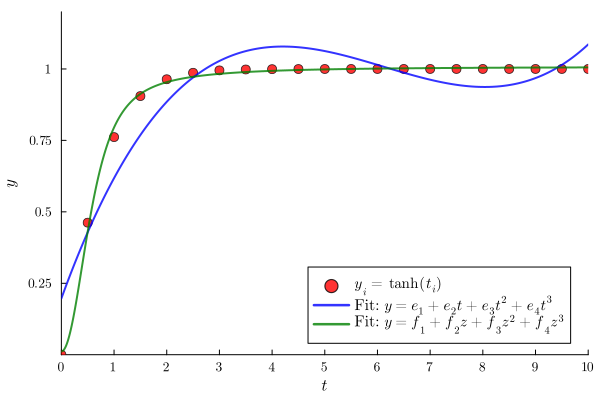

In [ ]:
using Plots, LaTeXStrings
gr()

default(fontfamily = "Computer Modern",  # Font LaTeX-style
        legendfontsize = 10,
        tickfontsize = 9,
        guidefontsize = 11)

# linea di fit
t_fit =  0:0.001:10# Evita log(0)
z_fit = (t_fit.^2) ./(1. .+ t_fit.^2)
y1_fit = e₁ .+ e₂ .* t_fit .+ e₃ .* t_fit.^2 .+ e₄ .* t_fit.^3 
y2_fit = f₁ .+ f₂ .* z_fit .+ f₃ .* z_fit.^2 .+ f₄ .* z_fit.^3
# Plot principale
grafico = plot(t, y, 
              seriestype = :scatter, 
              markersize = 5, 
              color = :red, 
              alpha = 0.8, 
              label = L"$y_i = \tanh(t_i)$")

#linee di fit
plot!(grafico, t_fit, y1_fit,
      linewidth = 2,
      color = :blue,
      alpha = 0.8,
      label = L"Fit: $y = e_1 + e_2 t + e_3 t^2 + e_4 t^3$")

plot!(grafico, t_fit, y2_fit,
      linewidth = 2,
      color = :green,
      alpha = 0.8,
      label = L"Fit: $y = f_1 + f_2 z + f_3 z^2 + f_4 z^3$"
      )

xlims!(grafico, 0, 10)
ylims!(grafico, 0, tanh(10)+0.2)


x_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x_labels = [L"$0$", L"$1$", L"$2$", L"$3$", L"$4$", L"$5$", L"$6$", L"$7$", L"$8$", L"$9$", L"$10$"]

y_positions =[0.25, 0.5, 0.75, 1]
y_labels = [L"$0.25$", L"$0.5$", L"$0.75$", L"$1$"]

plot!(grafico,
      xticks = (x_positions, x_labels),
      yticks = (y_positions, y_labels),
      grid = false,
      gridwidth = 1,
      gridcolor = :gray,
      gridalpha = 0.3,
      )          # Dimensione font titolo)

xlabel!(grafico, L"t")
ylabel!(grafico, L"$y$")


#= Aggiungi info sul fit
annotate!(grafico, [(2000, 2, L"$c = %$(round(c, digits=2))$"),
                   (2000, 1, L"$\alpha = %$(round(α, digits=2))$")])
 =#

display(grafico)

In [ ]:
# Dopo aver calcolato i coefficienti...

# Calcola i valori predetti per entrambi i fit
y1_pred = e₁ .+ e₂ .* t .+ e₃ .* t.^2 .+ e₄ .* t.^3
y2_pred = f₁ .+ f₂ .* z .+ f₃ .* z.^2 .+ f₄ .* z.^3

# Calcola i residui
residui1 = y - y1_pred  # Residui fit polinomiale
residui2 = y - y2_pred  # Residui fit trigonometrico

# Calcola χ² (chi-quadro)
χ²₁ = sum(residui1.^2)  # χ\^2\_1[TAB]
χ²₂ = sum(residui2.^2)  # χ\^2\_2[TAB]

# Calcola χ² ridotto (normalized)
n = length(y)           # Numero di punti dati
p₁ = 7                  # Numero di parametri fit polinomiale (c₁...c₇)
p₂ = 5                  # Numero di parametri fit trigonometrico (d₁...d₅)

χ²_ridotto₁ = χ²₁ / (n - p₁)  # Gradi di libertà = n - p
χ²_ridotto₂ = χ²₂ / (n - p₂)

println("CHI-QUADRO")
println("Fit Polinomiale (grado 6):")
println("  χ² = ", χ²₁)
println("  χ² ridotto = ", χ²_ridotto₁)
println("  Gradi di libertà = ", n - p₁)

println("\nFit Trigonometrico:")
println("  χ² = ", χ²₂)
println("  χ² ridotto = ", χ²_ridotto₂)
println("  Gradi di libertà = ", n - p₂)


if χ²₁ < χ²₂
    println("Fit POLINOMIALE migliore (χ² più piccolo)")
    println("Miglioramento: ", round((χ²₂ - χ²₁)/χ²₂ * 100, digits=1), "%")
else
    println("Fit TRIGONOMETRICO migliore (χ² più piccolo)")
    println("Miglioramento: ", round((χ²₁ - χ²₂)/χ²₁ * 100, digits=1), "%")
end

LoadError: UndefVarError: `e₁` not defined in `Main`
Suggestion: check for spelling errors or missing imports.